# Student Performance Predictive Analytics

Dataset: https://www.kaggle.com/datasets/larsen0966/student-performance-data-set

# Pendahuluan

Tema dari analisis ini adalah keuangan dimana hasilnya akan berupa model machine learning yang nanti dapat digunakan untuk memprediksi lulus atau tidaknya siswa dari data student performance

# Data Loading

berikut ini library yang akan di import

In [1]:
import zipfile, math
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from google.colab import files

menampilkan data

In [2]:
df = pd.read_csv('/content/student-por.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


# Exploratory Data Analysis

Deskripsi Variabel

*   School : Sekolah siswa (binary: 'GP' - Gabriel Pereira atau 'MS' - Mousinho da Silveira)
*   sex : Jenis kelamin siswa ('F' - female atau 'M' - male)
*   age : Usia siswa (dalam tahun)
*   address : Lokasi rumah siswa ('U' - urban, 'R' - rural)
*   famsize : Ukuran keluarga ('LE3' - <=3 anggota, 'GT3' - >3 anggota)
*   Pstatus : Status orang tua tinggal bersama ('T' - together, 'A' - apart)
*   Medu : Tingkat pendidikan ibu (0=none, 1=primary, 2=5th-9th grade, 3=secondary, 4=higher)
*   Fedu : Tingkat pendidikan ayah (0=none, 1=primary, 2=5th-9th grade, 3=secondary, 4=higher)
*   Mjob : Pekerjaan ibu (teacher, health care, services, at_home, other)
*   Fjob : Pekerjaan ayah (teacher, health care, services, at_home, other)
*   reason : Alasan memilih sekolah (home, reputation, course preference, other)
*   guardian : Wali siswa (mother, father, other)
*   traveltime : Waktu perjalanan ke sekolah (1=<15min, 2=15-30min, 3=30min-1hr, 4=>1hr)
*   studytime : Waktu belajar mingguan (1=<2h, 2=2-5h, 3=5-10h, 4=>10h)
*   failures : Jumlah kegagalan dalam kelas sebelumnya
*   schoolsup : Dukungan tambahan dari sekolah (yes atau no)
*   famsup : Dukungan tambahan dari keluarga (yes atau no)
*   paid : Mengikuti les privat mata pelajaran matematika (yes atau no)
*   activities : Mengikuti aktivitas ekstrakurikuler (yes atau no)
*   nursery : Pernah ikut taman kanak-kanak (yes atau no)
*   higher : Keinginan untuk melanjutkan pendidikan tinggi (yes atau no)
*   internet : Akses internet di rumah (yes atau no)
*   romantic : Berstatus pacaran (yes atau no)
*   famrel : Kualitas hubungan keluarga (skala 1 - sangat buruk sampai 5 - sangat baik)
*   freetime : Waktu luang setelah sekolah (skala 1 - sangat sedikit sampai 5 - sangat banyak)
*   goout : Frekuensi keluar dengan teman (skala 1 - sangat jarang sampai 5 - sangat sering)
*   Dalc : Konsumsi alkohol harian (skala 1 - sangat rendah sampai 5 - sangat tinggi)
*   Walc : Konsumsi alkohol saat akhir pekan (skala 1 - sangat rendah sampai 5 - sangat tinggi)
*   health : Kondisi kesehatan saat ini (skala 1 - sangat buruk sampai 5 - sangat baik)
*   absences : Jumlah ketidakhadiran di sekolah
*   G1 : Nilai ujian semester 1 (0-20)
*   G2 : Nilai ujian semester 2 (0-20)
*   G3 : Nilai ujian semester 3 (0-20)











In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


mencari nilai yang missing

In [5]:
print(df.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


mencari kata unik

In [6]:
print(df.select_dtypes(include='object').nunique())

school        2
sex           2
address       2
famsize       2
Pstatus       2
Mjob          5
Fjob          5
reason        4
guardian      3
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
dtype: int64


melihat data distribusi kelulusan siswa jika G3 lebih dari sama dengan 10

<ipython-input-7-b36791cd22e5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pass', data=df, palette='pastel')


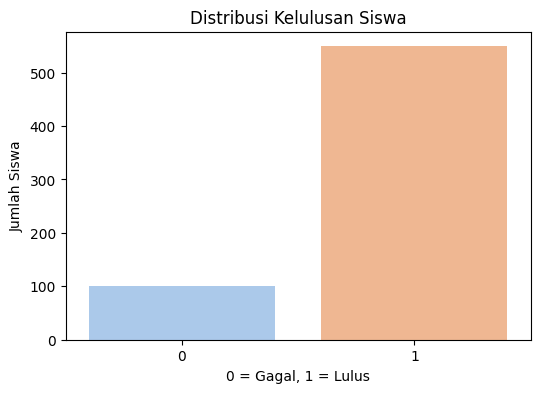

pass
1    84.59168
0    15.40832
Name: proportion, dtype: float64


In [7]:
# Membuat kolom baru: 'pass' = 1 kalau G3 >= 10, else 0
df['pass'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)

# Plot distribusi pass/fail
plt.figure(figsize=(6,4))
sns.countplot(x='pass', data=df, palette='pastel')
plt.title('Distribusi Kelulusan Siswa')
plt.xlabel('0 = Gagal, 1 = Lulus')
plt.ylabel('Jumlah Siswa')
plt.show()

print(df['pass'].value_counts(normalize=True) * 100)

menampilkan histogram nilai tiap semester 1-3

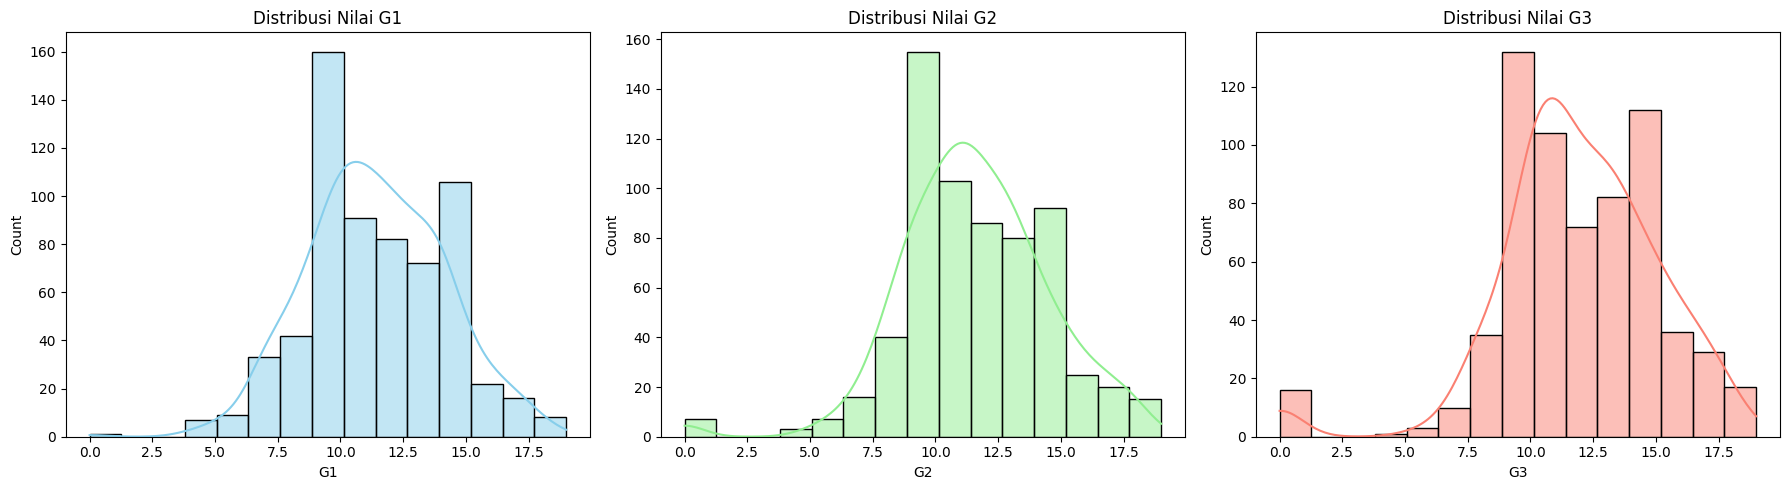

In [8]:
# Plot histogram nilai
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['G1'], bins=15, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribusi Nilai G1')

sns.histplot(df['G2'], bins=15, kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title('Distribusi Nilai G2')

sns.histplot(df['G3'], bins=15, kde=True, ax=axes[2], color='salmon')
axes[2].set_title('Distribusi Nilai G3')

plt.tight_layout()
plt.show()


menampilkan korelasi antar variabel

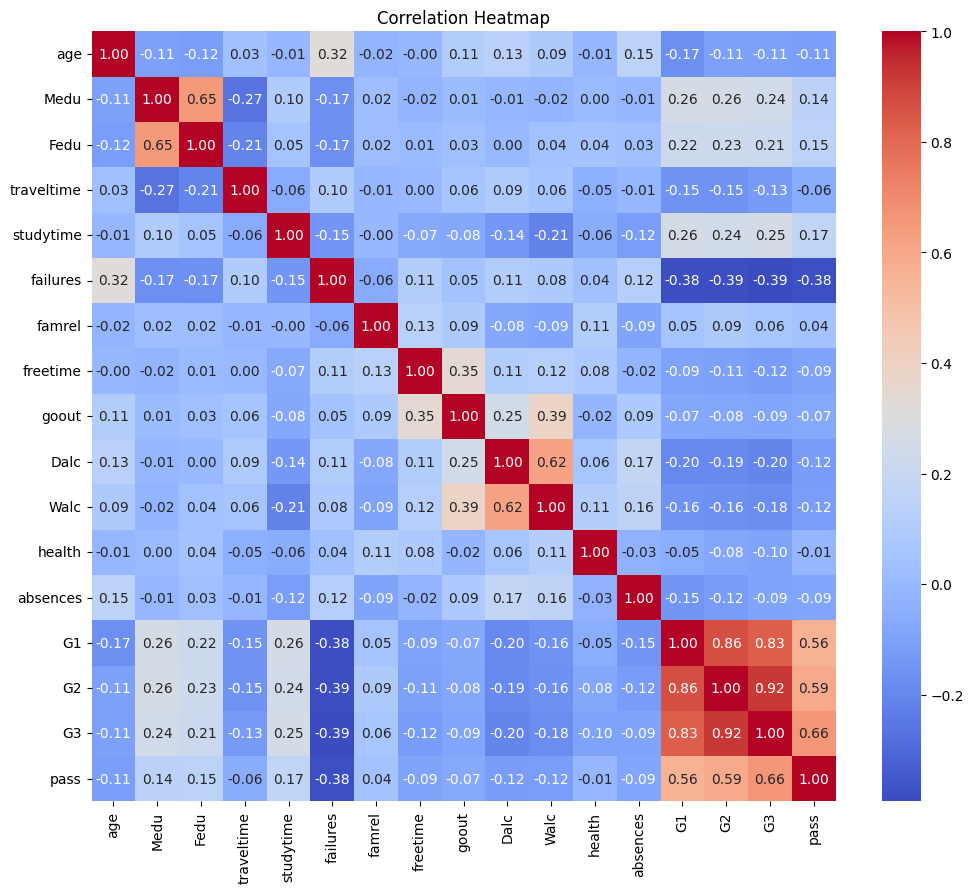

In [10]:
# Korelasi hanya untuk kolom numerik
plt.figure(figsize=(12,10))
# Select only numerical columns before calculating correlation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

dari gambar diatas bahwa
Korelasi punya nilai dari -1 sampai +1:

+1 → hubungan positif sempurna (kalau satu naik, yang lain juga naik persis).

-1 → hubungan negatif sempurna (kalau satu naik, yang lain turun persis).

0 → tidak ada hubungan linear.

Warna:

Merah → Korelasi positif kuat.

Biru → Korelasi negatif kuat.

Putih/Pucat → Korelasi mendekati nol.

Dari heatmap kamu:

G1, G2, dan G3 sangat berkorelasi positif satu sama lain (0.86, 0.83, 0.92):

Ini wajar, karena G1 (nilai ujian 1), G2 (ujian 2), dan G3 (nilai akhir) biasanya saling berhubungan.

G3 berkorelasi cukup kuat dengan pass (0.66):

Artinya, nilai G3 berhubungan positif dengan lulus atau tidaknya siswa (makes sense kan, nilai akhir tinggi = kemungkinan lulus tinggi).

failures berkorelasi negatif dengan G1, G2, G3, dan pass (sekitar -0.38):

Semakin banyak kegagalan sebelumnya, semakin rendah nilai dan peluang lulus.

Medu (pendidikan ibu) dan Fedu (pendidikan ayah) juga berkorelasi satu sama lain (0.65):

Cukup logis, karena pasangan biasanya memiliki tingkat pendidikan yang mirip.

Fitur lain seperti health, absences, freetime, goout punya korelasi kecil banget terhadap pass — artinya mungkin pengaruhnya kecil terhadap lulus/tidaknya siswa.

code dibawah ini untuk menampilkan kelulusan berdasarkan jenis kelamin, agar nantinya bisa tahu lebih jelas

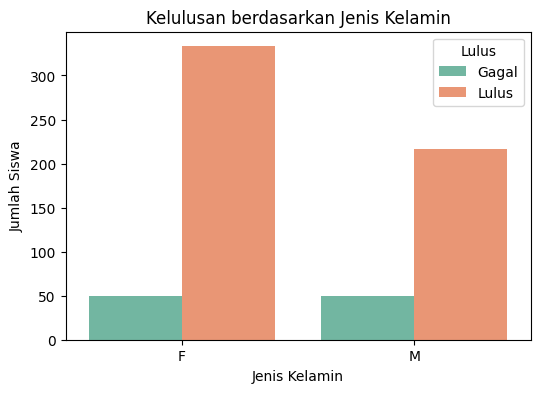

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='pass', data=df, palette='Set2')
plt.title('Kelulusan berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Siswa')
plt.legend(title='Lulus', labels=['Gagal', 'Lulus'])
plt.show()


lalu absensi juga, ditampilkan distribusinya

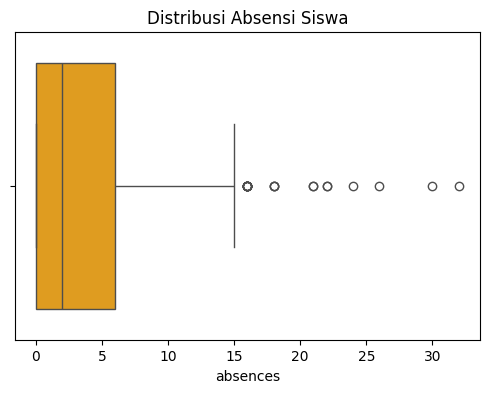

In [12]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['absences'], color='orange')
plt.title('Distribusi Absensi Siswa')
plt.show()


# Data Preparation

fitur yang digunakan

In [13]:
selected_features = ['sex', 'age', 'studytime', 'failures',
                     'schoolsup', 'famsup', 'paid',
                     'activities', 'higher', 'internet',
                     'romantic', 'famrel', 'freetime',
                     'goout', 'Dalc', 'Walc', 'health',
                     'absences', 'G1', 'G2', 'G3']

data = df[selected_features].copy()

membuat target lulus/tidak dari data G3

In [14]:
# Misal: G3 >= 10 dianggap lulus
data['pass'] = data['G3'].apply(lambda x: 1 if x >= 10 else 0)

# Drop kolom G3 karena sudah dipakai untuk label
data = data.drop(columns=['G3'])


encode fitur kategorikal

In [16]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Cek kolom mana saja yang bertipe object
categorical_cols = data.select_dtypes(include=['object']).columns

# Encode semua kolom kategorikal
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

split data train test

In [17]:
# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['pass'])
y = data['pass']

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


standrisasi fitur numerik

In [18]:
# Standarisasi semua fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Model Development

menggunakan 3 models untuk membandingkan siapa yang lebih bagus dalam klasifikasi prediksi lulus atau tidak

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(random_state=42)
}

# Buat tempat untuk menyimpan hasil evaluasi
results = {}

evaluasi dengan acc,prec,rec,f1. sehingga nantinya model mana yang paling bagus evaluasi

Model: Random Forest
              precision    recall  f1-score   support

           0       0.68      0.75      0.71        20
           1       0.95      0.94      0.94       110

    accuracy                           0.91       130
   macro avg       0.82      0.84      0.83       130
weighted avg       0.91      0.91      0.91       130

----------------------------------------


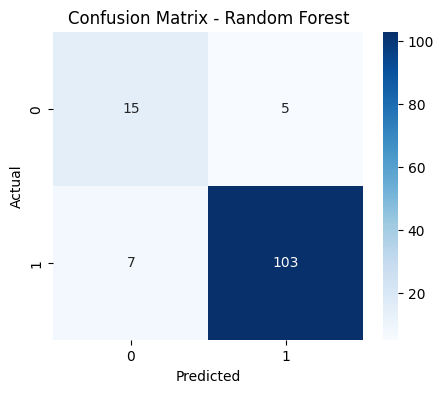

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.71      0.60      0.65        20
           1       0.93      0.95      0.94       110

    accuracy                           0.90       130
   macro avg       0.82      0.78      0.80       130
weighted avg       0.89      0.90      0.90       130

----------------------------------------


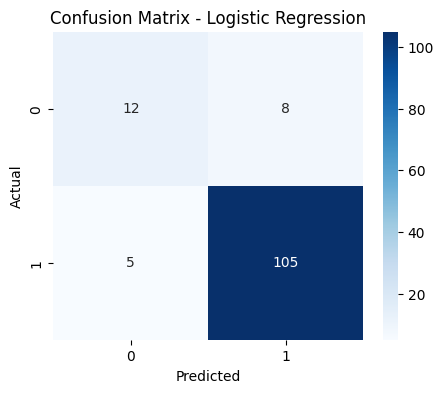

Model: SVM
              precision    recall  f1-score   support

           0       0.62      0.50      0.56        20
           1       0.91      0.95      0.93       110

    accuracy                           0.88       130
   macro avg       0.77      0.72      0.74       130
weighted avg       0.87      0.88      0.87       130

----------------------------------------


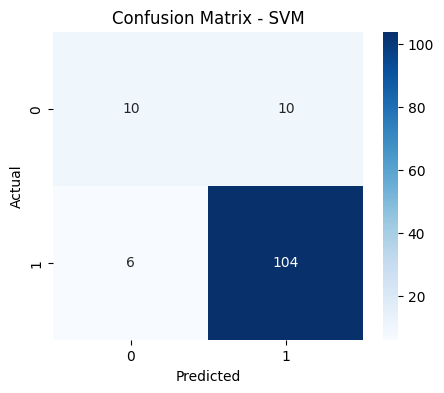

In [24]:
# Training, prediksi, dan evaluasi semua model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report # Import classification_report

for name, model in models.items():
    # Training
    model.fit(X_train, y_train)

    # Prediksi
    y_pred = model.predict(X_test)

    # Evaluasi
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Simpan hasil
    results[name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    }

    # Print laporan
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print("-" * 40)

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

menampilkan hasil agar lebih jelas

In [25]:
# Tampilkan hasil evaluasi dalam bentuk tabel
results_df = pd.DataFrame(results).T
print("Hasil Evaluasi Semua Model:")
print(results_df)

Hasil Evaluasi Semua Model:
                     Accuracy  Precision    Recall  F1-Score
Random Forest        0.907692   0.953704  0.936364  0.944954
Logistic Regression  0.900000   0.929204  0.954545  0.941704
SVM                  0.876923   0.912281  0.945455  0.928571


ini adalah perbandingan evaluasi dari ketiga model sebelumnya, yang dimana model rf itu lebih bagus ketimbang keduanya

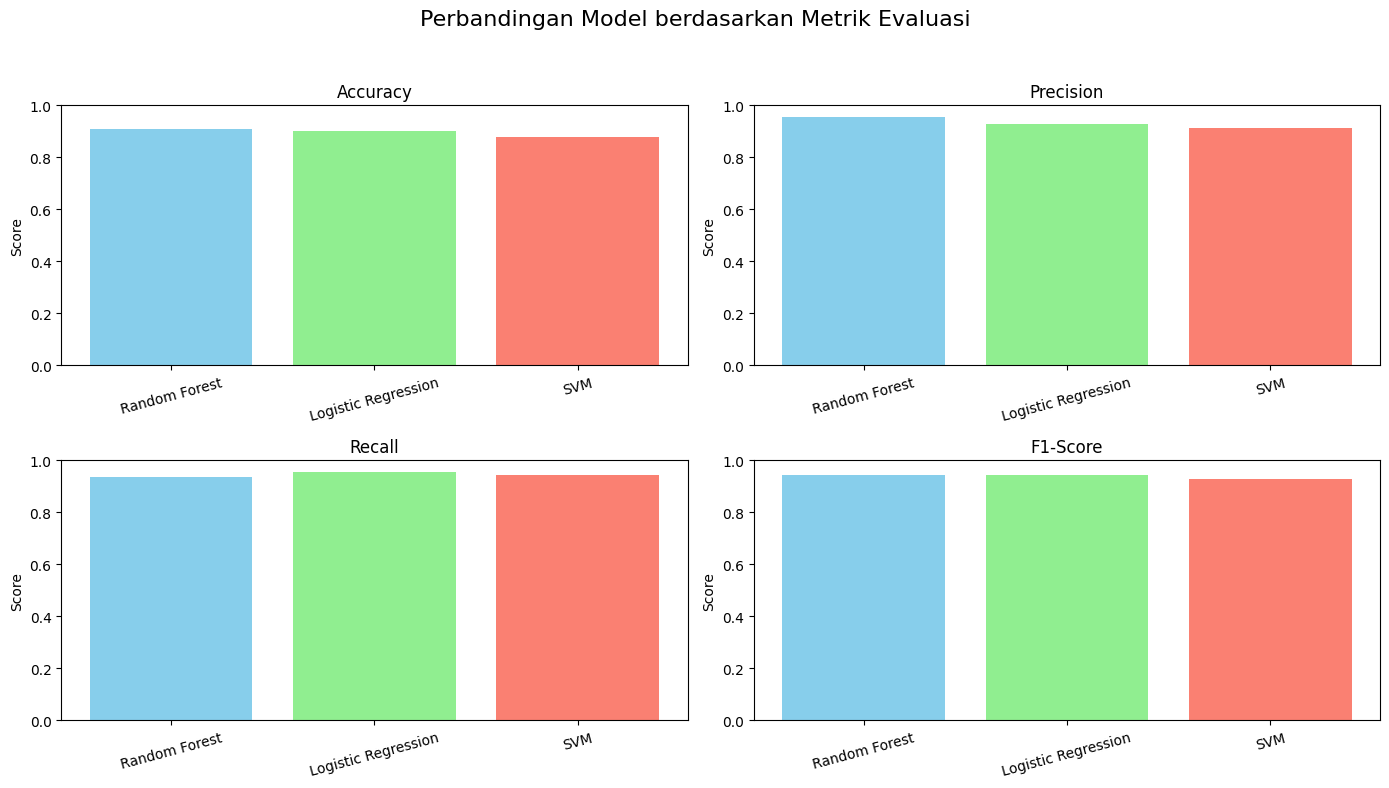

In [26]:
import matplotlib.pyplot as plt

# Buat daftar metric yang mau divisualisasikan
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Set ukuran figure
plt.figure(figsize=(14, 8))

# Loop untuk membuat 4 subplot (1 untuk tiap metric)
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    plt.bar(results_df.index, results_df[metric], color=['skyblue', 'lightgreen', 'salmon'])
    plt.title(metric)
    plt.ylim(0, 1)  # karena semua nilai antara 0-1
    plt.ylabel('Score')
    plt.xticks(rotation=15)

plt.suptitle('Perbandingan Model berdasarkan Metrik Evaluasi', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


memprediksi dengan model rf, karena evaluasi sebelumnya paling bagus dan nantinya akan menampilkan hasil prediksi siswa lulus atau tidak

In [28]:
# Menggunakan model terbaik (misalnya Random Forest)
best_model = models["Random Forest"]

# Melakukan prediksi pada data testing
y_pred = best_model.predict(X_test)

# Menambahkan hasil prediksi ke DataFrame untuk melihat hasilnya
df_test_predictions = pd.DataFrame(X_test) # X_test was a numpy array
df_test_predictions.columns = X.columns # Assign column names
df_test_predictions['Predicted Outcome'] = y_pred

# Menyaring siswa yang diprediksi lulus atau tidak lulus
df_test_predictions['Predicted Result'] = df_test_predictions['Predicted Outcome'].apply(lambda x: 'Lulus' if x == 1 else 'Tidak Lulus')

# Menampilkan hasil prediksi
print(df_test_predictions[['age', 'sex', 'studytime', 'failures', 'G1', 'G2', 'Predicted Result']])

# Misalnya, kamu ingin melihat berapa banyak yang lulus
lulus_count = df_test_predictions['Predicted Result'].value_counts()
print(lulus_count)

          age       sex  studytime  failures        G1        G2  \
0   -0.591052  1.208187   0.071210  -0.37338  0.225027  0.151707   
1   -0.591052 -0.827686   0.071210  -0.37338  0.225027 -0.204564   
2   -0.591052 -0.827686  -1.120989  -0.37338  1.333783  0.507978   
3    1.015001 -0.827686   1.263410  -0.37338  0.964198  1.933063   
4    1.818027  1.208187   0.071210   2.88350 -0.883729 -0.917107   
..        ...       ...        ...       ...       ...       ...   
125  0.211974  1.208187   1.263410  -0.37338  0.594612  0.864249   
126 -0.591052  1.208187   0.071210  -0.37338 -0.883729 -0.917107   
127 -0.591052 -0.827686   0.071210  -0.37338  0.225027  0.151707   
128 -1.394079  1.208187  -1.120989  -0.37338  0.225027  0.507978   
129  1.015001  1.208187   0.071210  -0.37338 -0.514144 -0.917107   

    Predicted Result  
0              Lulus  
1              Lulus  
2              Lulus  
3              Lulus  
4              Lulus  
..               ...  
125            Lulus  

menampilkan klasifikasi report

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluasi hasil prediksi
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.75      0.71        20
           1       0.95      0.94      0.94       110

    accuracy                           0.91       130
   macro avg       0.82      0.84      0.83       130
weighted avg       0.91      0.91      0.91       130

Confusion Matrix:
 [[ 15   5]
 [  7 103]]


menganalisis hasil dan interpretasi untuk rf

In [31]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

       Feature  Importance
19          G2    0.318630
18          G1    0.245919
3     failures    0.071825
17    absences    0.044590
8       higher    0.034487
15        Walc    0.034384
11      famrel    0.032014
12    freetime    0.028348
1          age    0.028235
13       goout    0.025966
14        Dalc    0.025739
16      health    0.023150
2    studytime    0.017486
10    romantic    0.012492
5       famsup    0.011491
0          sex    0.010644
4    schoolsup    0.009896
9     internet    0.009828
7   activities    0.009506
6         paid    0.005369


# Penutup

Model untuk memprediksi kelulusan siswa yang lulus atau tidak telah selesai dibuat dan dari hasil pengujian, ketiga model yang dibuat memiliki performa yang baik dan dapat digunakan untuk memprediksi data sebenarnya hanya saja model terbaik ialah model RF karena RF memiliki nilai evaluasi yang tinggi dibandingkan dengan model lain.